### References - 
1. https://www.kaggle.com/faressayah/linear-regression-house-price-prediction/data
2. https://www.youtube.com/watch?v=vtm35gVP8JU

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\House Price Prediction\train.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Checking for missing values

In [4]:
df.isnull().sum().sum()    # there are total 6965 NaN values

6965

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df[df.columns[df.isnull().any()]].isnull().sum()   # Ref - https://stackoverflow.com/questions/36226083/how-to-find-which-columns-contain-any-nan-value-in-pandas-dataframe

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

We have 1460 rows, and if say 1453 or even 1179 of them are Nan values, they can be dropped as they wouldnt affect the result that much. (As a threshold, dropping columns which have more than 50% of NaN values is decent enough)

<AxesSubplot:>

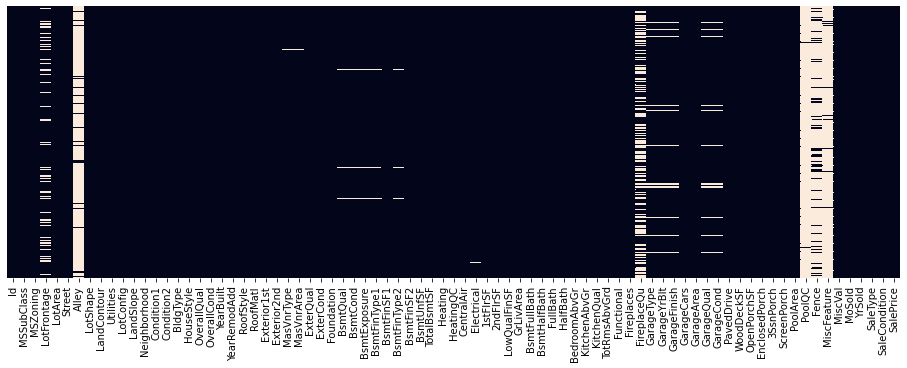

In [7]:
plt.figure(figsize = (16,5))   # For adjusting size of heat map, ref = https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

The white (yellow) lines show the missing values.

## Handling missing data

In [8]:
df.shape

(1460, 81)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df[df.columns[df.isnull().any()]].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
# First we deal with LotFrontage which has 259 Nan values
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [12]:
# Replacing all the values with its mean
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [13]:
# df['LotFrontage'].mean()

In [14]:
df[df.columns[df.isnull().any()]].isnull().sum()

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
# Now dropping Alley column
df.drop(['Alley'], axis=1, inplace=True)

In [16]:
# Dealing with BsmtCond
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [17]:
# We can see how since it is kinda categorical, we should give the NaN values the most occuring of these, i.e. its mode
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

In [18]:
# Similarly

df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [19]:
df.drop(['GarageYrBlt', 'PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [20]:
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

<AxesSubplot:>

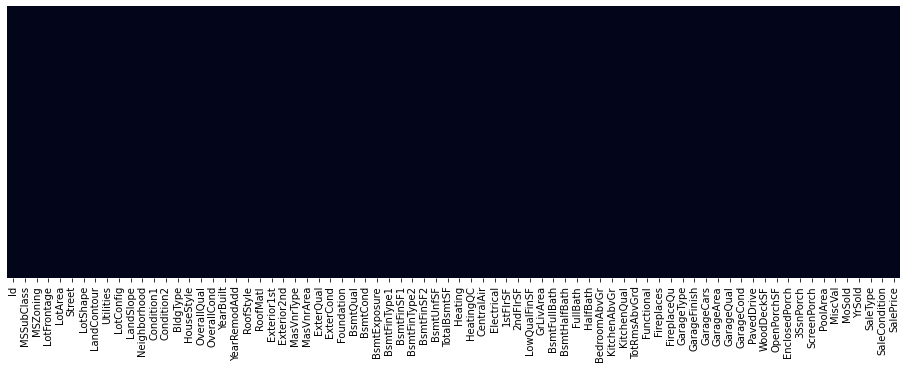

In [21]:
plt.figure(figsize = (16,5))   # For adjusting size of heat map, ref = https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

All Nan Values removed or handled

In [22]:
df.shape

(1460, 76)

In [23]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Handling Categorical Features

In [24]:
# Making a list of all columns which have categorical data
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [25]:
len(columns)

39

Before we start one hot encoding, there were some columns in train data which say had 3 types of categories, and the same column in test data say had 4 types of categories. Now this would be a problem, so we will just concatenate train and test data by rows so that later while applying one hot encoding function all categories in that column would get included.

In [26]:
main_df = df.copy()        # Making a copy of original for being safe

In [27]:
test_df = pd.read_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\House Price Prediction\formulatedtest.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [28]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [29]:
final_df = pd.concat([df,test_df],axis=0)

In [30]:
final_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


Test data doesn't have SalePrice so after concatenation final_df will have NaN values in the end (as can be seen above) which is fine we will drop it later.

## One Hot Encoding by Pandas get_dummies

In [31]:
def category_onehot_multcols(multcolumns):
    df_final = final_df
    i = 0
    for fields in multcolumns:
        print(fields)
        dummies = pd.get_dummies(final_df[fields], drop_first=True)  # this is removing one of the hot encoded columns (redundant column) (west windsor in LR5)
        final_df.drop([fields],axis=1,inplace=True)   # This is dropping the very column we just hot encoded (town in LR5)
        if i == 0:
            df_final = dummies.copy()
        else:
            df_final = pd.concat([df_final,dummies],axis=1)
        i = i+1
       
    df_final = pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [32]:
final_df.shape   # 76 columns now

(2919, 76)

In [33]:
final_df = category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [34]:
final_df.shape   # 237 columns now

(2919, 237)

In [35]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,1,0,1
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,1,0,1
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,1,0,1
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,0,0,0,1,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,1,0,1


In [36]:
final_df.columns.duplicated()  # we can see we have duplicated columns which we don't want

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True, False,
       False, False,

In [37]:
final_df.columns.value_counts()   # there are 10 Gd columns which are exactly same, so they will all have equal importance which will result in correlation, basically bad for our model.

Gd             10
TA              9
Fa              8
Po              6
Stone           4
               ..
CulDSac         1
IR2             1
TotalBsmtSF     1
Pave            1
CarPort         1
Length: 177, dtype: int64

In [38]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]  # to remove duplicate columns

In [39]:
final_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [40]:
final_df.columns.value_counts()

Plywood       1
NWAmes        1
MasVnrArea    1
Inside        1
BsmtFinSF2    1
             ..
ImStucc       1
Po            1
NoRidge       1
ConLI         1
CarPort       1
Length: 177, dtype: int64

In [41]:
final_df.shape   # 177 columns now

(2919, 177)

In [42]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,1,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,1,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,1,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,1,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,1,1,0,0,0,0,1,0


## Now we prepare our data for our model

In [43]:
df.shape

(1460, 76)

In [44]:
test_df.shape

(1459, 75)

In [45]:
df_Train=final_df.iloc[:1460,:]   # We just saw above how many rows were in training set and how many were in testin set, so we divide according to that.
df_Test=final_df.iloc[1460:,:]

In [46]:
df_Train['SalePrice']   # I am using SalePrice column to check if it is divided properly, the last saleprice is not NaN so good.

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [47]:
df_Test['SalePrice']   # The very first SalePrice is a NaN value, which means it is divided perfectly.

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1454   NaN
1455   NaN
1456   NaN
1457   NaN
1458   NaN
Name: SalePrice, Length: 1459, dtype: float64

In [48]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)   # Dropping this column bcoz it has NaN values 

D:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
# Our main data which we train model on
X = df_Train.drop(['SalePrice'],axis=1)    # X ofc has all columns except SalePrice
y = df_Train['SalePrice']    # y ofc has only Sale Price column

## Now we apply Linear Regression Algorithm

In [50]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [51]:
reg.fit(X,y)

LinearRegression()

In [52]:
reg.score(X,y)

0.9131051226013752

In [53]:
p = reg.predict(df_Test)
p

array([129173.79121238, 172042.06013239, 186612.74698289, ...,
       177188.77271239, 104979.85601157, 240499.8598722 ])

In [54]:
predicted_test = test_df.copy()

In [55]:
predicted_test['SalePrice'] = p

In [56]:
predicted_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,129173.791212
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172042.060132
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,186612.746983
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,191442.083384
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,212706.741501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,75873.301663
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,66228.595143
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,177188.772712
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,104979.856012


In [57]:
predicted_test.to_csv(r'C:\Users\surya\Desktop\Jupyter Python Programs\House Price Prediction\Predicted Test.csv', index=False)